# 📰 Fake News Detection System

This project classifies news as **real** or **fake** using NLP and Logistic Regression.

**Tech Stack**: Python, NLTK, Scikit-learn, TF-IDF, Logistic Regression


In [1]:
!pip install nltk scikit-learn pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:

# Load fake and real news
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add a label column
fake["label"] = "fake"
real["label"] = "real"

# Combine the datasets
df = pd.concat([fake, real], axis=0).reset_index(drop=True)

# Keep only the 'text' and 'label' columns for simplicity
df = df[["text", "label"]]

# Save it as a new combined file (optional)
df.to_csv("dataset.csv", index=False)

df.head()


,text,label
0,Donald Trump just couldn t wish all Americans ...,fake
1,House Intelligence Committee Chairman Devin Nu...,fake
2,"On Friday, it was revealed that former Milwauk...",fake
3,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis used his annual Christmas Day mes...,fake


In [7]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df["cleaned_text"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({"fake": 0, "real": 1})


In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.9851893095768374

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



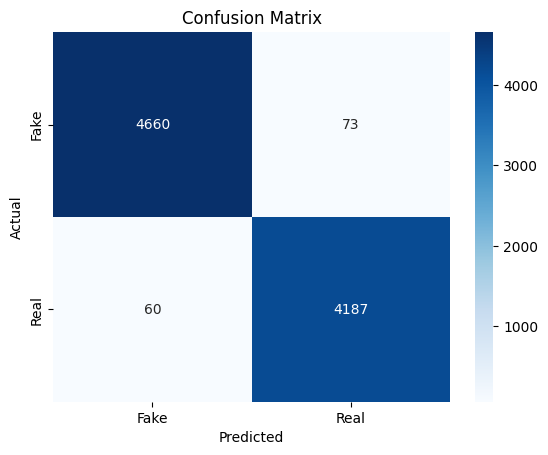

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
text = input("Enter a news article:\n")
cleaned = clean_text(text)
vec = tfidf.transform([cleaned])
pred = model.predict(vec)[0]

if pred == 1:
    print("🟢 This news is REAL.")
else:
    print("🔴 This news is FAKE.")


🟢 This news is REAL.
